In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [44]:
# Checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
# Checking duplicate data
print(f"Number of duplicate data: {df.duplicated().sum()}")

Number of duplicate data: 0


In [46]:
# Checking unique values
def check_unique_values():
    unique_df = []
    cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
    data_list = []
    for col in cols:
        data_list.append([col, df[col].unique(), df[col].nunique()])
    unique_df = pd.DataFrame(data_list, columns=['Name', 'Values', 'Number of Values'])
    return unique_df

In [47]:
check_unique_values()

,Name,Values,Number of Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,PhoneService,"[No, Yes]",2
5,MultipleLines,"[No phone service, No, Yes]",3
6,InternetService,"[DSL, Fiber optic, No]",3
7,OnlineSecurity,"[No, Yes, No internet service]",3
8,OnlineBackup,"[Yes, No, No internet service]",3
9,DeviceProtection,"[No, Yes, No internet service]",3


In [48]:
# Replace "No phone service" with "No" 
df.replace({'MultipleLines': {'No phone service': 'No'}}, inplace=True)

In [49]:
# Replace "No internet service" with "No" 

cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
        df.replace({col: {'No internet service': 'No'}}, inplace=True)

In [50]:
check_unique_values()

,Name,Values,Number of Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,PhoneService,"[No, Yes]",2
5,MultipleLines,"[No, Yes]",2
6,InternetService,"[DSL, Fiber optic, No]",3
7,OnlineSecurity,"[No, Yes]",2
8,OnlineBackup,"[Yes, No]",2
9,DeviceProtection,"[No, Yes]",2


Text(0.5, 1.0, 'Churn Feature Distribution')

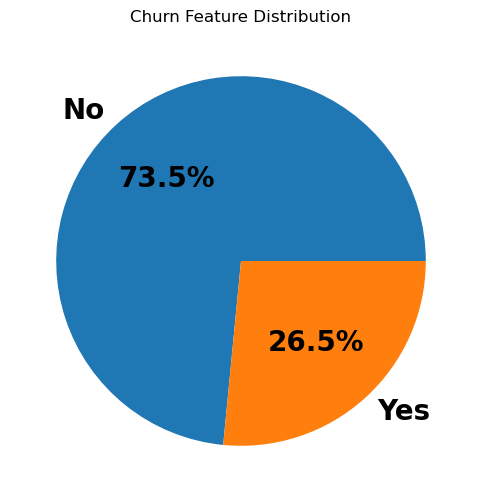

In [51]:
# Visualizing Target Feature "Churn"

plt.figure(figsize=(10, 6))
plt.pie(df["Churn"].value_counts(), labels=df["Churn"].value_counts().keys(), autopct="%1.1f%%",
        textprops={"fontsize": 20, "fontweight": "black"})
plt.title("Churn Feature Distribution")

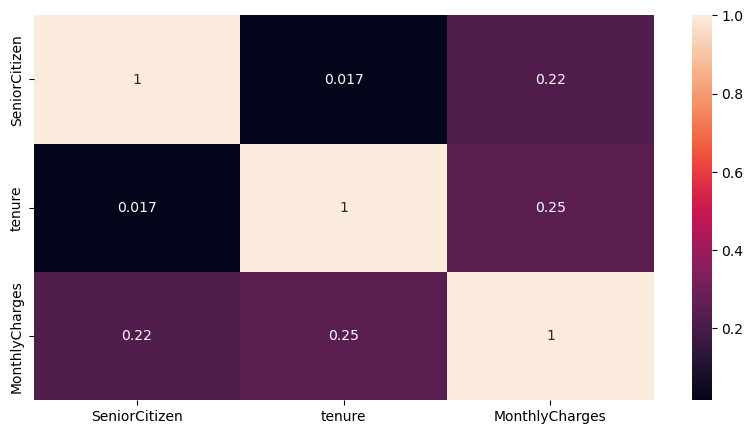

In [52]:
# Check correlation in data
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

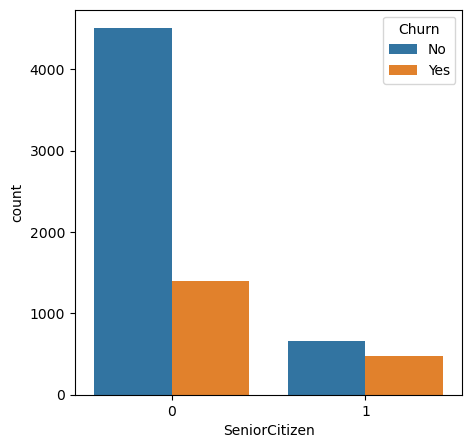

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.show()

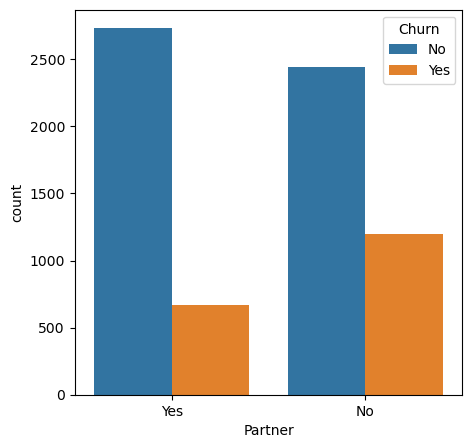

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(x='Partner', data=df, hue='Churn')
plt.show()

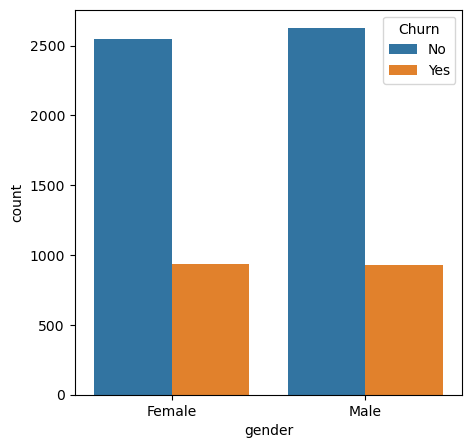

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=df, hue='Churn')
plt.show()

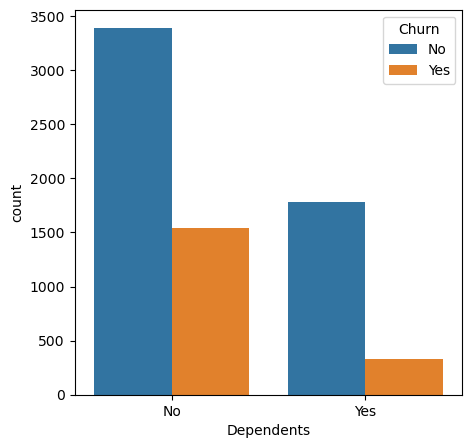

In [56]:
plt.figure(figsize=(5,5))
sns.countplot(x='Dependents', data=df, hue='Churn')
plt.show()

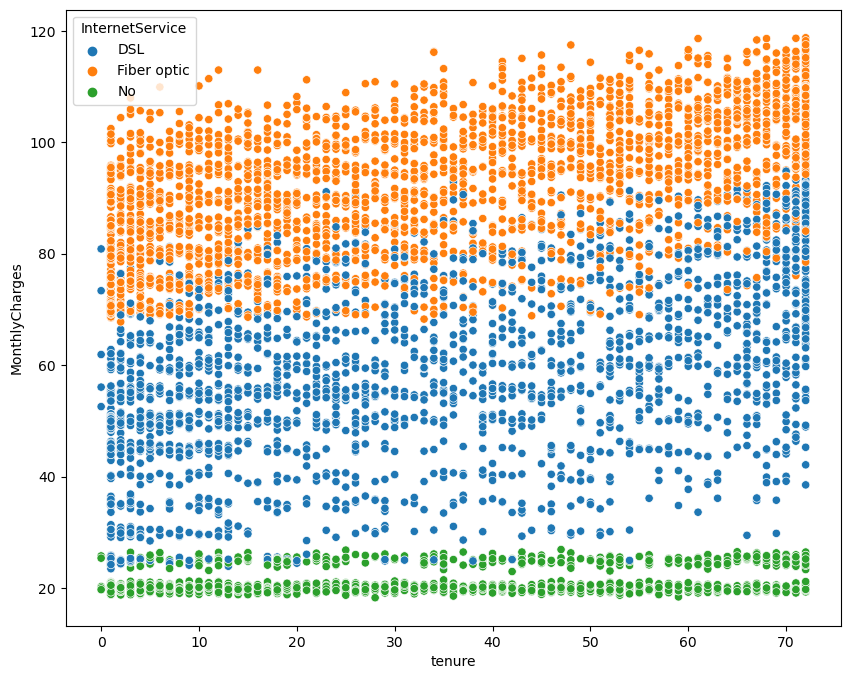

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, hue='InternetService')
plt.show()

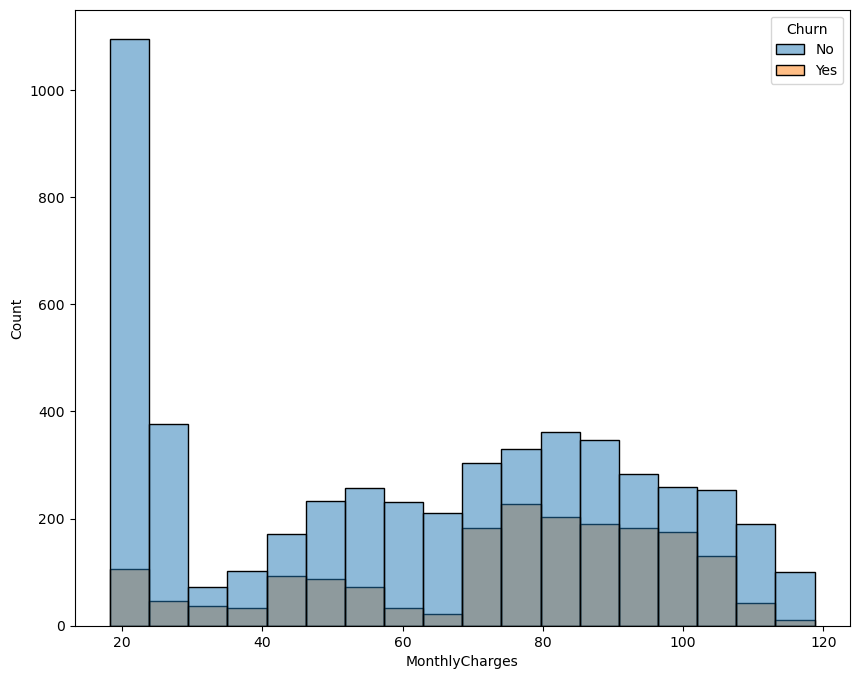

In [58]:
plt.figure(figsize=(10,8))
sns.histplot(x='MonthlyCharges', data=df, hue='Churn')
plt.show()

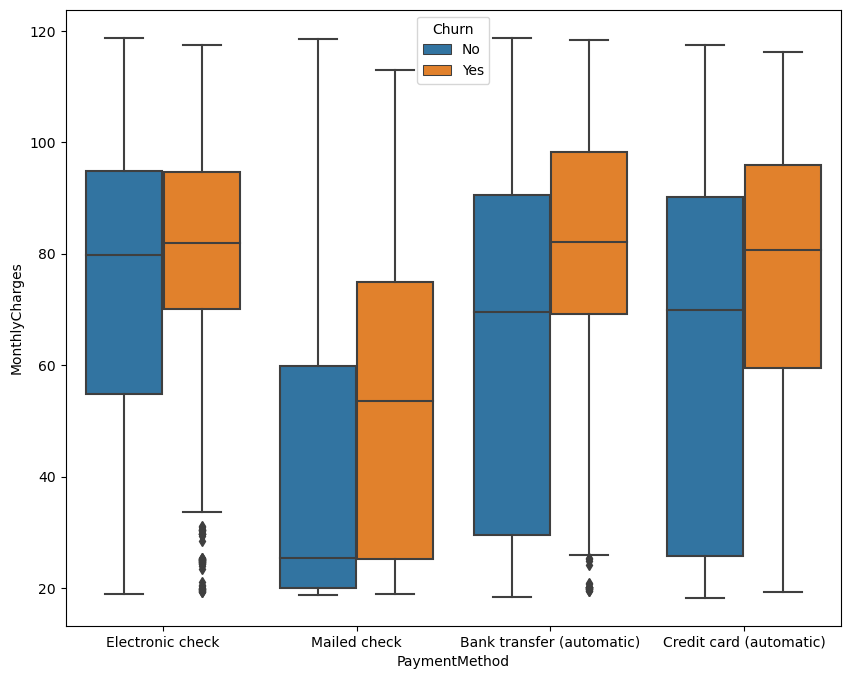

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, hue='Churn')
plt.show()

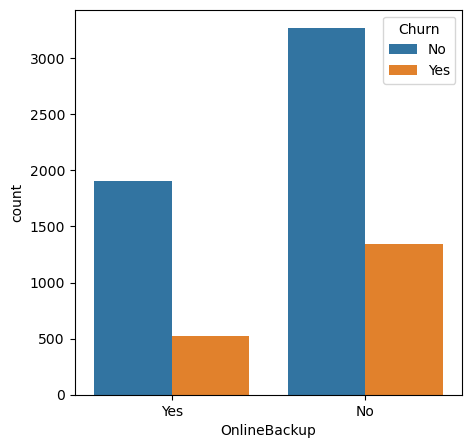

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x='OnlineBackup', data=df, hue='Churn')
plt.show()

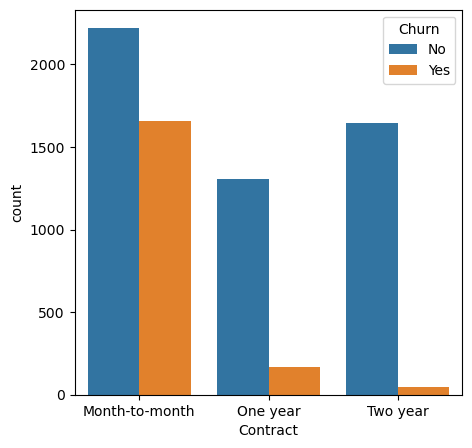

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.show()

In [62]:
# We don't need "customerID" we can drop it
df.drop('customerID', inplace=True, axis=1)

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
# feature engineering on MonthlyCharges Feature
# we will create a new feature Monthly Charges Group and will split the Monthly Charges into different groups on the basics of insights we gained from EDA.

def monthly_charges_group(df):
    charges_group  = []
    for i in df["MonthlyCharges"]:
        if i<=20:
            charges_group.append("charges_0_20")
        elif (i>20 and i<=40):
            charges_group.append("charges_20_40")
        elif (i>40 and i<=60):
            charges_group.append("charges_40_60")
        elif (i>60 and i<=80):
            charges_group.append("charges_60_80")
        elif (i>80 and i<=100):
            charges_group.append("charges_80_100")
        elif (i>100):
            charges_group.append("charges_100+")
        else:
            charges_group.append(np.nan)
        
    df["Monthly Charges Group"] = charges_group

In [65]:
monthly_charges_group(df)

In [66]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Monthly Charges Group
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,charges_20_40
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,charges_40_60
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,charges_40_60
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,charges_40_60
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,charges_60_80


In [67]:
encoded_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'Monthly Charges Group']], drop_first=True)

In [68]:
encoded_df

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthly Charges Group_charges_100+,Monthly Charges Group_charges_20_40,Monthly Charges Group_charges_40_60,Monthly Charges Group_charges_60_80,Monthly Charges Group_charges_80_100
0,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
7039,0,0,1,1,1,1,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
7040,0,0,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
7041,1,1,1,0,1,1,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0


In [69]:
final_df = pd.concat([encoded_df, df[['MonthlyCharges', 'TotalCharges']]], axis=1)

In [70]:
final_df

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthly Charges Group_charges_100+,Monthly Charges Group_charges_20_40,Monthly Charges Group_charges_40_60,Monthly Charges Group_charges_60_80,Monthly Charges Group_charges_80_100,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,29.85,29.85
1,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,56.95,1889.5
2,0,1,0,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,53.85,108.15
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,84.80,1990.5
7039,0,0,1,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,103.20,7362.9
7040,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,29.60,346.45
7041,1,1,1,0,1,1,1,0,0,0,...,0,1,1,0,0,0,1,0,74.40,306.6


In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   gender_Male                            7043 non-null   uint8  
 2   Partner_Yes                            7043 non-null   uint8  
 3   Dependents_Yes                         7043 non-null   uint8  
 4   PhoneService_Yes                       7043 non-null   uint8  
 5   MultipleLines_Yes                      7043 non-null   uint8  
 6   InternetService_Fiber optic            7043 non-null   uint8  
 7   InternetService_No                     7043 non-null   uint8  
 8   OnlineSecurity_Yes                     7043 non-null   uint8  
 9   OnlineBackup_Yes                       7043 non-null   uint8  
 10  DeviceProtection_Yes                   7043 non-null   uint8  
 11  Tech

In [72]:
# Replace empty values with 0
final_df.replace({'TotalCharges': {' ': 0}}, inplace=True)

In [73]:
# Change "TotalCharges" column data type to be "float" instead of "object"
final_df['TotalCharges'] = final_df['TotalCharges'].astype(float)

In [74]:
final_df.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Monthly Charges Group_charges_100+,Monthly Charges Group_charges_20_40,Monthly Charges Group_charges_40_60,Monthly Charges Group_charges_60_80,Monthly Charges Group_charges_80_100,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,29.85,29.85
1,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,56.95,1889.50
2,0,1,0,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,53.85,108.15
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,70.70,151.65


In [75]:
# Extracting target variable
y = final_df.pop('Churn_Yes')
X = final_df

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Applying MinMaxScaler on data
mms = MinMaxScaler(feature_range=(0, 1))

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
X = pd.DataFrame(mms.fit_transform(X))

In [81]:
# Spliting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
X_train.shape

(4930, 27)

In [83]:
X_test.shape

(2113, 27)

In [84]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1695,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.521891,0.434092
1095,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.619900,0.009275
3889,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010448,0.029897
3667,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.779104,0.260622
2902,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.555721,0.051918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.763682,0.010939
5191,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.724876,0.253120
5226,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028856,0.035240
5390,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.807960,0.138190


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score, precision_score

In [87]:
def model_prediction(model):
    training_score = []
    testing_score = []
    model.fit(X_train,y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    a = accuracy_score(y_train,X_train_pred)*100
    b = accuracy_score(y_test,X_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,X_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,X_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,X_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,X_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 99.83772819472617
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 72.2669190724089

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.4899328859060403
Recall Score of DecisionTreeClassifier() model is: 0.5087108013937283
F1 Score of DecisionTreeClassifier() model is: 0.49914529914529915

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


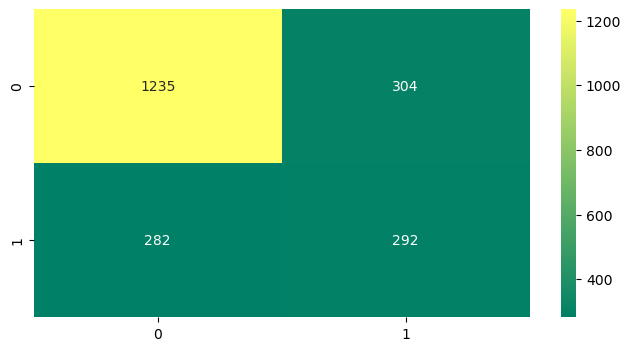

In [58]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of LogisticRegression() model on Training Data is: 80.40567951318458
Accuracy_Score of LogisticRegression() model on Testing Data is: 80.69096071935637

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.6836283185840708
Recall Score of LogisticRegression() model is: 0.5383275261324042
F1 Score of LogisticRegression() model is: 0.6023391812865497

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


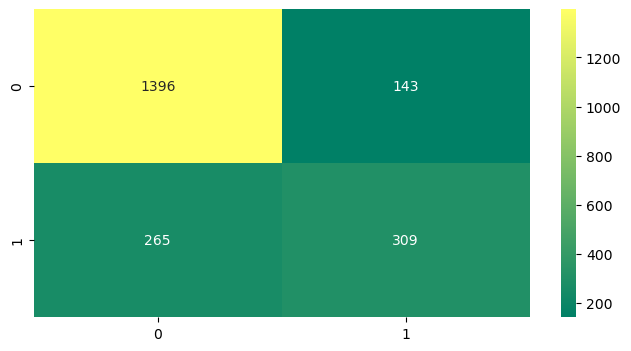

In [49]:
model_prediction(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 81.50101419878297
Accuracy_Score of SVC() model on Testing Data is: 79.36583057264552

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.676923076923077
Recall Score of SVC() model is: 0.45993031358885017
F1 Score of SVC() model is: 0.5477178423236515

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


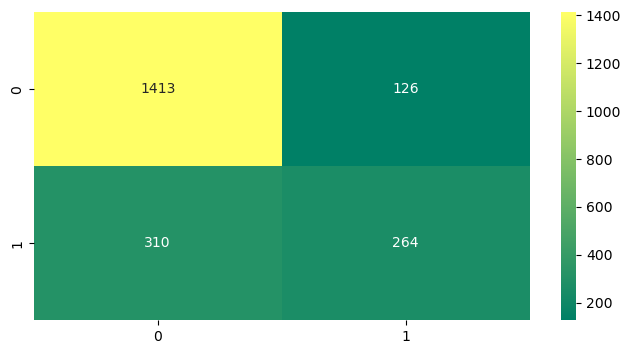

In [50]:
model_prediction(SVC())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 99.83772819472617
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 79.69711310932324

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.6772616136919315
Recall Score of RandomForestClassifier() model is: 0.48257839721254353
F1 Score of RandomForestClassifier() model is: 0.5635808748728381

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


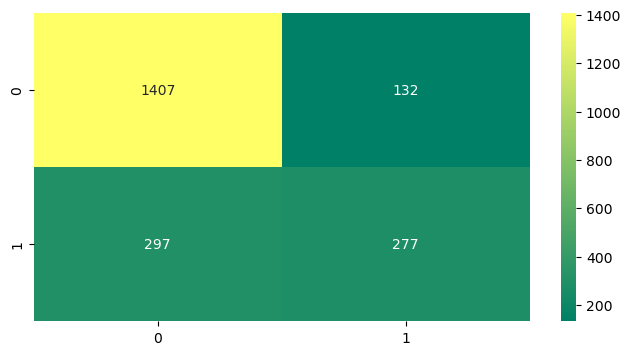

In [51]:
model_prediction(RandomForestClassifier())

In [109]:

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random']
            }
        },
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {}
        },
        'SVC': {
            'model': SVC(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma': ['scale', 'auto']
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ['gini', 'entropy']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],
                          cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [110]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,DecisionTreeClassifier,0.733428,"{'criterion': 'entropy', 'splitter': 'random'}"
1,LogisticRegression,0.799716,{}
2,SVC,0.795884,"{'gamma': 'auto', 'kernel': 'rbf'}"
3,RandomForestClassifier,0.783676,{'criterion': 'entropy'}
